<a href="https://colab.research.google.com/github/hellocybernetics/Tensorflow-Probability-Tutorials/blob/master/tutorials/01_basics/edward2_interception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
tf.enable_eager_execution()
ed = tfp.edward2

## model
This model is just a tutorial model where $w$ and $b$ only are random variable. 
$$
\begin{align}
w &\sim \mathcal N(3, 1)  \\
b &\sim \mathcal N(5, 1)  \\
y &= wx + b
\end{align}
$$

In [0]:
def model(x):
    w = ed.Normal(loc=3., scale=1., name='w')
    b = ed.Normal(loc=5., scale=1., name='b')
    y = w*x+b
    return y

In [0]:
x = tf.linspace(0., 5., 100)

### interceptor
When we have observed (or trained) some random variables, we want to regard it as a fixed values. Using enterceptor code as below, we can let random variables to fixed values.

In [0]:
def interceptor(model, *args, **kwargs):
    name = kwargs.get('name')
    if name == 'w':
        kwargs['value'] = 10
    if name == 'b':
        kwargs['value'] = 0
    return ed.interceptable(model)(*args, **kwargs)

In [0]:
# random
y_sample1 = model(x)

# random
y_sample2 = model(x)

# not random
with ed.interception(interceptor):
    y_value = model(x)

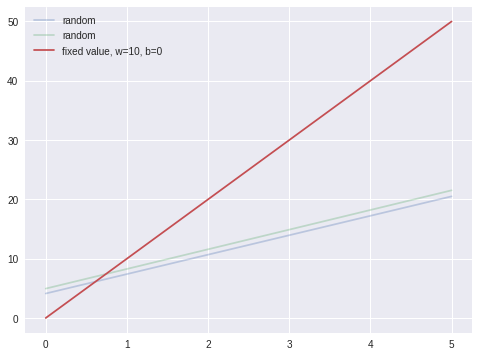

In [0]:
plt.figure(figsize=(8, 6))
plt.plot(x.numpy(), y_sample1.numpy(), alpha=0.3)
plt.plot(x.numpy(), y_sample2.numpy(), alpha=0.3)
plt.plot(x.numpy(), y_value.numpy())
plt.legend(['random', 'random', 'fixed value, w=10, b=0'])